#Introduction to Reggression with Neutral Networks in TF

There are many definition for a regresion problem but in our case , we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...Predicting a number

In [ ]:
#Import tensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


##Creating some data to view and fit

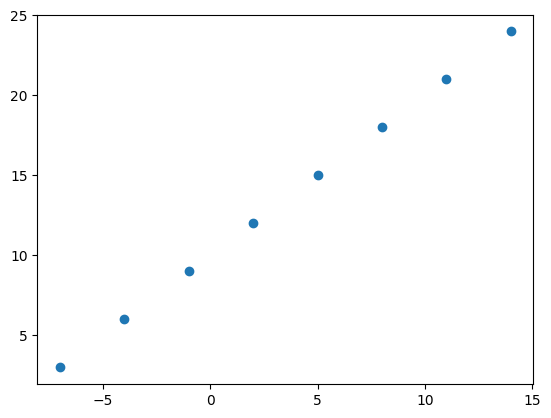

In [ ]:
from re import X
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]


(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
#Turn our Numpyarrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

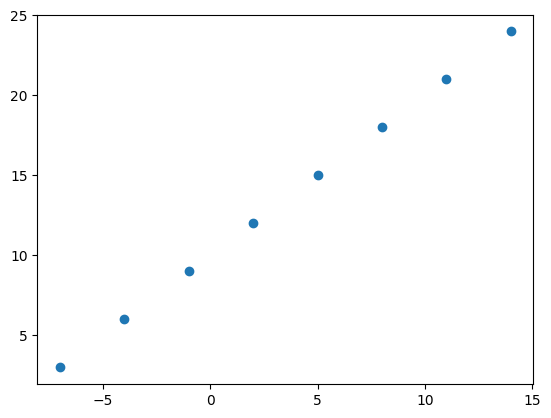

In [ ]:
plt.scatter(X,y)

##Steps in modeling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function(in other words the function whitch tells out model how wrong it is and the optimizer(tells our model how to improve the pattern its learning) and evaluatio metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - this is a letting the model try to find patterns between X and Y (featurs and labels)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile themodel
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics=["mae"])

#3. Fir the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 499ms/step - loss: 16.6153 - mae: 16.6153
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 16.3341 - mae: 16.3341
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 16.0528 - mae: 16.0528
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 15.7716 - mae: 15.7716
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 15.4903 - mae: 15.4903


In [ ]:
#Check X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#TRY AND MAKE A PREDICIOTN USING A MODEL
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 49ms/step


array([[-8.016311]], dtype=float32)

In [ ]:
y_pred+10

array([[1.9836893]], dtype=float32)

##Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of units(neurons)
witihn each of the hideen layers, change the activation function of each layer

2. **Compiling a model** - here we might change the optimization function or prehaps the **learnign rate** of optimization function

3. Fitting the model here we might fit a model for more **epochs**(leave it training for longer) or on more data(give more data)

In [ ]:
#Rebuilding model

#1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 500ms/step - loss: 17.5009 - mae: 17.5009
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 17.2197 - mae: 17.2197
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 16.9384 - mae: 16.9384
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 16.6572 - mae: 16.6572
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 16.3759 - mae: 16.3759
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 16.0947 - mae: 16.0947
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 15.8134 - mae: 15.8134
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 15.5322 - mae: 15.5322
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 15.2509 - mae: 15.2509
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.9697 - mae: 14.9697
Epoch 11/100
1/1 [==============================

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Lets see if our model prediction has imporoved
model.predict([17.0])

1/1 [==============================] - 0s 53ms/step


array([[29.543606]], dtype=float32)

In [ ]:
#1. Create our model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile themodel
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 763ms/step - loss: 13.3260 - mae: 13.3260
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3169 - mae: 12.3169
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2983 - mae: 11.2983
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2663 - mae: 10.2663
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.2168 - mae: 9.2168
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1457 - mae: 8.1457
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.0478 - mae: 7.0478
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8840 - mae: 6.8840
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3292 - mae: 7.3292
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7811 - mae: 7.7811
Epoch 11/100
1/1 [==============================] - 0s 10ms/

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[27.371078]], dtype=float32)

##Evaluating model

In practice, a typical workflow toull go trough when building NN is:

Build a model->fit it -> evaluete it -> tweak a model->fit it -> evaluete it -> tweak a model->fit it -> evaluete it -> tweak a modelm

When it comes to evaluation.. There are 3 words you should memorize:

VISUALIZE,VISUALIZE,VISUALIZE

*Its good idea to visalize:
*The data-what data are we working with How that look like?
*The model itseld, what does our model look like
*The training of a model-how does a model perform with
The predicions of the modle-how do the predictions model line up agains the ground truth(the original labels)

In [ ]:
#Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make labels for dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

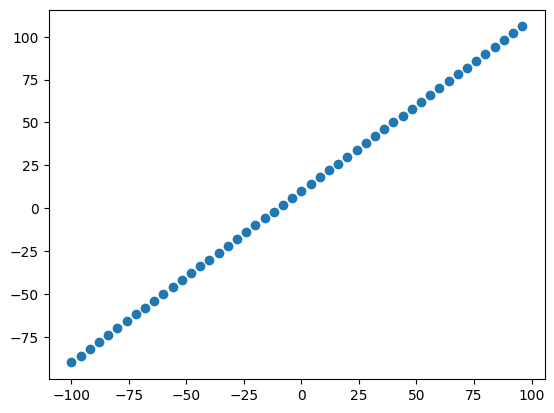

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets!!!

# **Training set**-model learns from this tf.data,which is typically 70-80% of the total data you have available.
# **Validation set**-the model gets tuned on this data, which is typically 10-15 % of data available
# **Test set**-the model gets evalueted on this data to set to test what is has learned, this set is typically 10-15% of total available data

In [ ]:
#Check the lenght of how many samples we have
len(X)

50

In [ ]:
#Split the data on test and train sets
X_train=X[:40] #First 40 samples
y_train = y[:40]

X_test=X[40:] #last 10 samples
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

###Visualing the data
Now we've got our data in trainging and sets... let's visualize it again

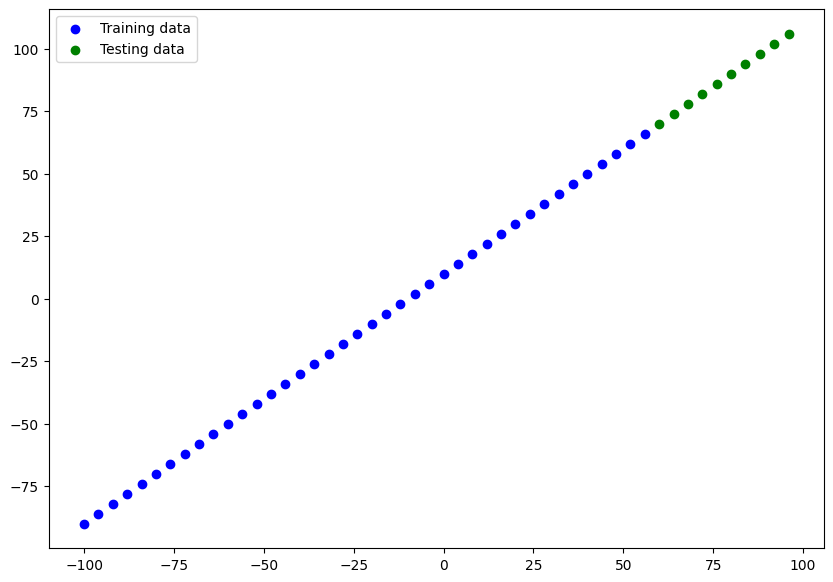

In [ ]:
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(X_train,y_train,c="b",label="Training data")
  #plot test data in green
  plt.scatter(X_test,y_test,c="g",label="Testing data")
  #Show that legend
  plt.legend();

In [ ]:
#Lets have a look how to build a neural network for our data

#Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3.Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 70.5968 - mae: 70.5968
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 22.5298 - mae: 22.5298
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3740 - mae: 12.3740
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4531 - mae: 10.4531
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 13.1537 - mae: 13.1537
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 13.8240 - mae: 13.8240
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4746 - mae: 10.4746
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6508 - mae: 11.6508
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9114 - mae: 9.9114
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 9.9579 - mae: 9.9579
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

In [ ]:
#Lets create a model which build automaticlly by defininf a input shape
tf.random.set_seed(42)

#Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

#Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



 *Total parms-total number of parameters in the model
 *Trainable parameters - these are the Parameters(patterns)
 *Non-trainable params-these parameters arent updated during (train is typical when you bring  in alredy leran patterns or parameters from other models during ** transfer learning ** **transfer LEARNING**


 Resource: For a more in depthoverview of the trainable params within layer,check it out MIT introduction to deep learning video

 Exercise try playing around with the number of hidden units in the dense layer, see how that effects the number of params(total and trainable)by calling 'model.summary'


In [ ]:
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2896 - mae: 0.2896
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4009 - mae: 0.4009
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 0.3567 - mae: 0.3567
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 0.7789 - mae: 0.7789
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 0.8792 - mae: 0.8792
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.5930 - mae: 0.5930
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.5781 - mae: 0.5781
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 0.8514 - mae: 0.8514
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5950 - mae: 0.5950
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 1.1372 - mae: 1.1372
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - loss

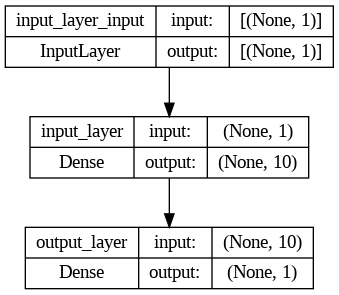

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)


##Visualizing our model prediciotins

To viusialize predictions its a good idea to plot them against the ground truth labels

Often you ll see this in the form ytest or ytrue versus ypred

In [ ]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[ 71.09925 ],
       [ 75.17145 ],
       [ 79.24365 ],
       [ 83.31586 ],
       [ 87.38806 ],
       [ 91.460266],
       [ 95.53247 ],
       [ 99.60467 ],
       [103.676865],
       [107.74907 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

If you feel like you are going to reuse some kind of functionality in the future its a good idea t to turn it in to fnuction

In [ ]:
# Lets create a ploting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data,test data and compares to predictions to group
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="trainging data")
  #plot testing in green
  plt.scatter(test_data,test_labels,c="g",label="testing")
  #plot models predicitons in red
  plt.scatter(test_data,predictions,c="r",label="predicitons")
  #show the legend
  plt.legend();


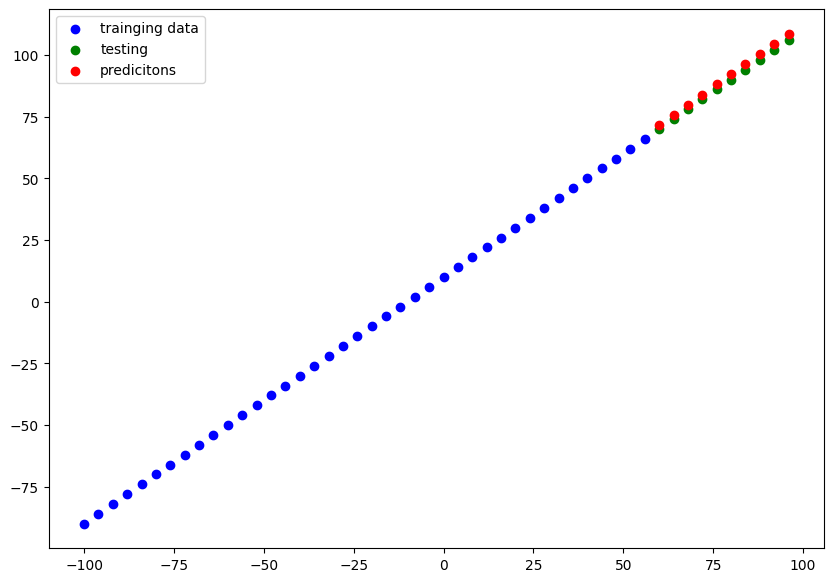

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)


###Evaluating our model prediciotns with reggresion evaluation metrics

Depending on the problem youre working on there will be different evaluation metrics to evaluate your models performance.

Since were working on a regression, two of the main metrics:
**MAE** -MEAN ABSOLUTE ERROR - "on average how wrong is each of my models predicitons"
**MSE** - mean square error , "square the average errors"

In [ ]:
#Evaluate model on the test
model.evaluate(X_test,y_test)


1/1 [==============================] - 0s 189ms/step - loss: 2.0950 - mae: 2.0950


[2.0950331687927246, 2.0950331687927246]

In [ ]:
#Calculate the mean absolute error:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.707056 , 13.766443 , 11.668396 , 10.412916 , 10.       ,
       10.4296465, 11.701856 , 13.8166275, 16.773968 , 20.573875 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 71.61618 ],
       [ 75.722595],
       [ 79.82901 ],
       [ 83.93542 ],
       [ 88.041824],
       [ 92.14823 ],
       [ 96.25464 ],
       [100.361046],
       [104.46746 ],
       [108.573875]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.61618 ,  75.722595,  79.82901 ,  83.93542 ,  88.041824,
        92.14823 ,  96.25464 , 100.361046, 104.46746 , 108.573875],
      dtype=float32)>

In [ ]:
#Calculate the mean absolute error:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.095028>

In [ ]:
#Calculate the mean square error:
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                  y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.4825563>

In [ ]:
#Make a functions to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

###Runing experiments to improve our model
Build a model - fir it  - evaluate it -tweak it -fit it - evaluate it i tako dalje u krug


1. Get more data-get more examples to train on(more oportunities to learn patterns or relationships between features and labels).


2. Make your model larger(using more complex model)-this might come in form of the layers or more hidden units in each layer.


3. Train for longer - give your model more of a chance to find patterns in the data

Lets do 3 modeling experiments:

1. model 1 -same as the original,1layer,trained for 100 epochs.
2. model 2 - 2 layers trained for 100 epochs
3. model 3 - 2 layers trained 500 epochs


**Build model 1**

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 68.6888 - mae: 68.6888
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 33.5114 - mae: 33.5114
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3648 - mae: 9.3648
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4038 - mae: 11.4038
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6790 - mae: 12.6790
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8097 - mae: 9.8097
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8900 - mae: 8.8900
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0886 - mae: 9.0886
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.5176 - mae: 19.5176
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5533 - mae: 10.5533
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 19ms/step


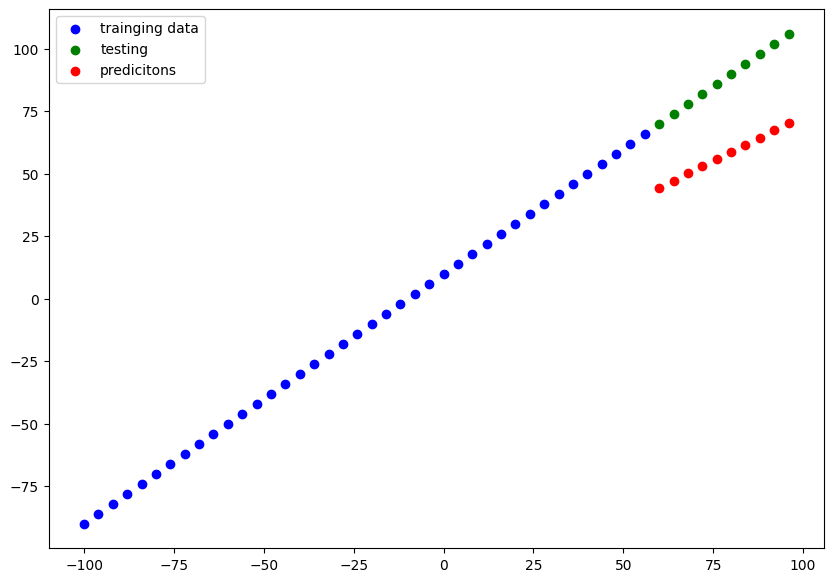

In [ ]:
#Make a plot and predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

NameError: ignored

**BUILD MODEL 2**

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3.Fit model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 12.8018 - mae: 12.8018
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 19.1070 - mae: 19.1070
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 23.1483 - mae: 23.1483
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 13.2549 - mae: 13.2549
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 17.3816 - mae: 17.3816
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1769 - mae: 10.1769
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 11.1617 - mae: 11.1617
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1149 - mae: 11.1149
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 40.6011 - mae: 40.6011
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 27.9784 - mae: 27.9784
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 42ms/step


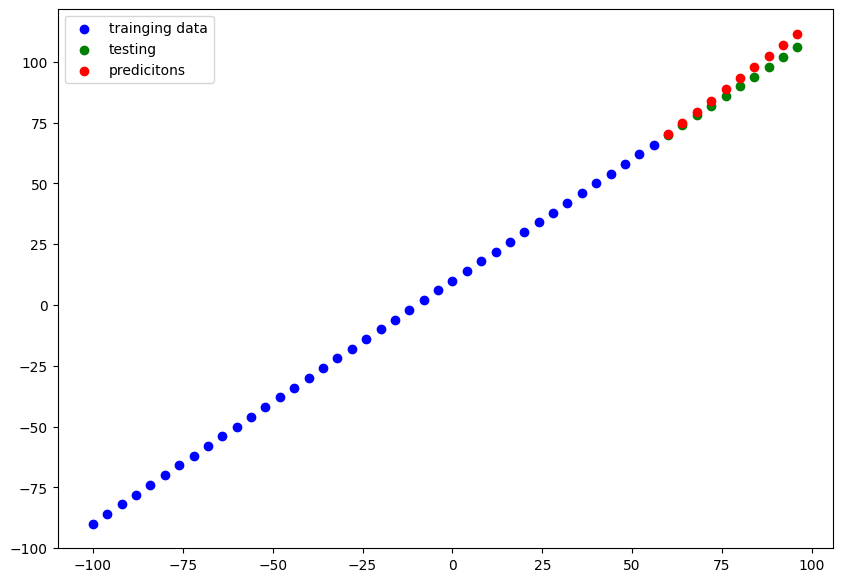

In [ ]:
#Make and plot predicitons of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
#Calculate model 2 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.189041>,
 <tf.Tensor: shape=(), dtype=float32, numpy=183.90414>)

Build model 3

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 36.7614 - mae: 36.7614
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 29.1893 - mae: 29.1893
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 35.0358 - mae: 35.0358
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 23.9720 - mae: 23.9720
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.2769 - mae: 14.2769
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4198 - mae: 11.4198
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.4587 - mae: 12.4587
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.9858 - mae: 10.9858
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 39.0138 - mae: 39.0138
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 26.5937 - mae: 26.5937
Epoch 11/500
2/2 [==============================] - 0s 8m

1/1 [==============================] - 0s 64ms/step


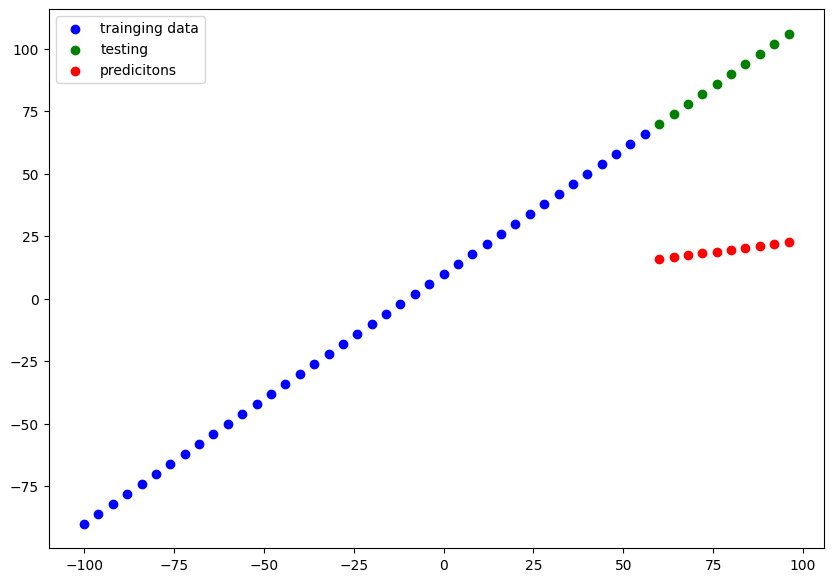

In [ ]:
#Make and plot some predicitons
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71444>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.181>)

In [ ]:
#Comparing the results of our experiments
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
                ["model_2",mae_2.numpy(),mse_2.numpy()],
                ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])

all_results

,model,mae,mse
0,model_1,30.543314,943.247192
1,model_2,13.189041,183.904144
2,model_3,68.714439,4808.181152


You want to start with small experiments

Model 2 perform the best one

In [ ]:
model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 10)                20        
                                                                 
 dense_80 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


One of your main goals should be to minimize the time beetween your experiments. The more experiments you do, the more things youll figure out which dont work and in turn,get closer to figure out what does work.
Remember
EXPERIMENT EXPERIMENT EXPERIMET

##Tracking your experiments

One really good habit is machine learingin modeling is to track your results of experiments

And when doing so it can be tedious if youre runnung lots of exepriments

Luckily there are tools to  help us

**TensorBoard** - component the TensorFlow libary to help track modelling experiments(later well se it)

**Weghts & Biases** - a tool for tracking all of kinds of machine learingn experiments(plugs straight into TensorBoard)

##Saving our models

Saving our models allows us to use it outside of Google Colab(or wherever they were trained) such as in a wweb application


There are 2 main formats we can save our model:

1. The saved model format
2. TheHDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
#Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [ ]:
# Load in the SavedModel format mdoel
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 10)                20        
                                                                 
 dense_80 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 10)                20        
                                                                 
 dense_80 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds ==loaded_SavedModel_format_preds

1/1 [==============================] - 0s 73ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds,loaded_SavedModel_format_preds

(array([[ 78.246284],
        [ 83.34468 ],
        [ 88.443054],
        [ 93.54145 ],
        [ 98.63984 ],
        [103.738235],
        [108.83663 ],
        [113.93502 ],
        [119.03342 ],
        [124.131805]], dtype=float32),
 array([[ 78.246284],
        [ 83.34468 ],
        [ 88.443054],
        [ 93.54145 ],
        [ 98.63984 ],
        [103.738235],
        [108.83663 ],
        [113.93502 ],
        [119.03342 ],
        [124.131805]], dtype=float32))

In [ ]:
mae(y_true=y_test , y_pred=model_2_preds) == mae(y_true=y_test , y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([ 78.246284,  83.34468 ,  88.443054,  93.54145 ,  98.63984 ,
       103.738235, 108.83663 , 113.93502 , 119.03342 , 124.131805],
      dtype=float32)

In [ ]:
#Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 10)                20        
                                                                 
 dense_80 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Ckech the see if h5 matches model 2

model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds=loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 77ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model(or any other file from google colab)

If u want to dowload it from colab:

1. Go to files tab and right click on the file and click dowload

2. Use code(see the cell below)

3. Save to google Drive by conecting drive and colab

In [ ]:
#Import the required liabries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test),len(y),len(y_train),len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

insurance_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 52.6477 - mae: 52.6477
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 45.2252 - mae: 45.2252
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 38.1866 - mae: 38.1866
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 31.0500 - mae: 31.0500
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 24.1800 - mae: 24.1800
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 17.4771 - mae: 17.4771
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.3904 - mae: 11.3904
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 8.2830 - mae: 8.2830
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9647 - mae: 9.9647
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2005 - mae: 11.2005
Epoch 11/100
2/2 [==============================] - 0s 9ms/

In [ ]:
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

history = insurance_model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200)

ValueError: ignored

In [ ]:
tf.random.set_seed(42)

insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history = insurance_model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 13ms/step - loss: 34.6402 - mae: 34.6402
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 29.8276 - mae: 29.8276
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 25.2085 - mae: 25.2085
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 20.5671 - mae: 20.5671
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 16.1287 - mae: 16.1287
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 11.9265 - mae: 11.9265
Epoch 7/200
2/2 [==============================] - 0s 7ms/step - loss: 8.6348 - mae: 8.6348
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 8.6764 - mae: 8.6764
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 9.6990 - mae: 9.6990
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 10.3122 - mae: 10.3122
Epoch 11/200
2/2 [==============================] - 0s 8ms/step 

<Axes: >

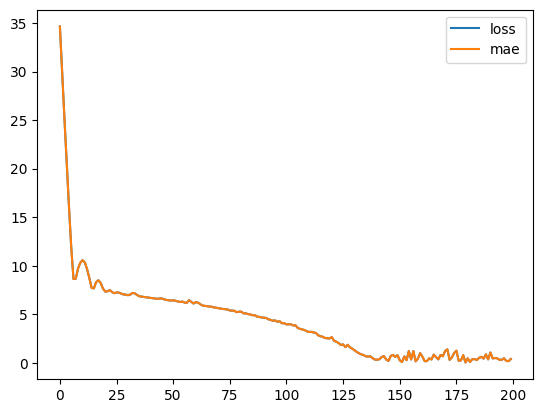

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()


<Axes: ylabel='Frequency'>

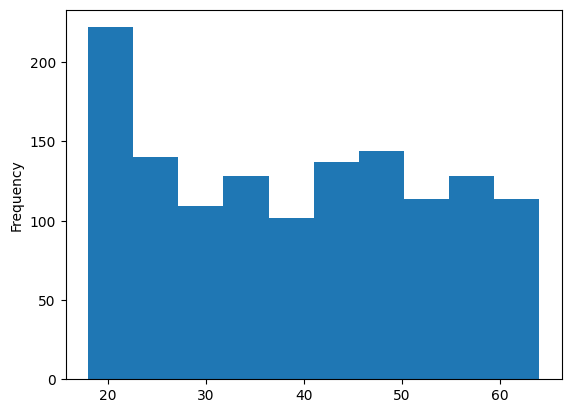

In [ ]:
X["age"].plot(kind="hist")


<Axes: ylabel='Frequency'>

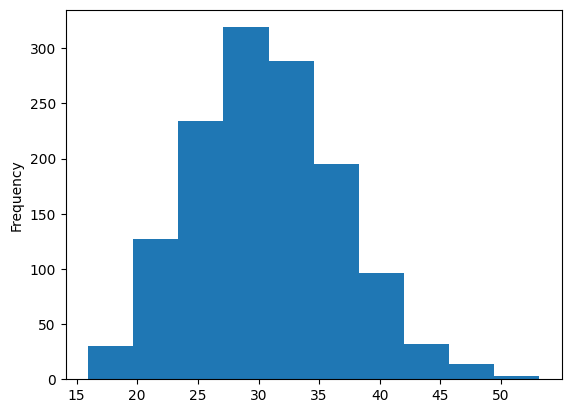

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Predprocessing data(normalazation and standardization)

If youre not sure on which to use you could try both and see which preforms better



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a classes from scikit leran


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
#Create X and y values
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#What does our data look like now?
X_train.loc[111]

age                55
sex            female
bmi              29.7
children            2
smoker             no
region      southwest
Name: 111, dtype: object

In [ ]:
X_train_normal[111]

array([0.17391304, 0.65173527, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

#Beautiful! Our data has been normalized and one hot encoded.

In [ ]:
tf.random.set_seed(42)

insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

history = insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13245.5674 - mae: 13245.5674
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 11553.1025 - mae: 11553.1025
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8191.6309 - mae: 8191.6309
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7613.8311 - mae: 7613.8311
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7126.7603 - mae: 7126.7603
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6538.6934 - mae: 6538.6934
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 5629.6123 - mae: 5629.6123
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 4470.1133 - mae: 4470.1133
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3756.9243 - mae: 3756.9243
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3679.0415 - mae: 3679.

In [ ]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3184.9021 - mae: 3184.9021


[3184.902099609375, 3184.902099609375]

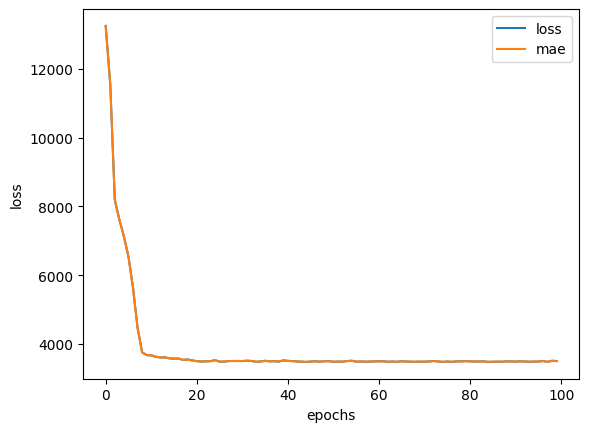

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");


In [ ]:
!nvidia -smi


/bin/bash: line 1: nvidia: command not found
